# DS 3000 HW 2

## Due: Friday October 3rd @ 11:59 PM EST

**Extra Credit Deadline: Wednesday Oct. 1 @ 11:59 PM EST**

Earliest Possible Submission: Tuesday Sep. 23

Your Name:

### Submission Instructions
Submit this `ipynb` file to Gradescope (this can also be done via the assignment on Canvas).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh **`Kernel > Restart & Run All`** just before uploading the `ipynb` file to gradescope.

### Tips for success
- Start early
- Make use of Piazza (also accessible through Canvas)
- Make use of Office Hours
- Remember to use cells and headings to make the notebook easy to read (if a grader cannot find the answer to a problem, you will receive no points for it)
- Under no circumstances may one student view or share their ungraded homework or quiz with another student [(see also)](http://www.northeastern.edu/osccr/academic-integrity), though you are welcome to **talk about** (*not* show each other your answers to) the problems.

### Special Note about this HW!

- Since you would be working with APIs, i would recommend if you have fully finished Part 1, save your notebook and then work on Part 2 and save your progress! Before you submit you would not have to do **`Kernel > Restart & Run All`**! We do not want you to hit the API call celing. You might have to wait for 24 hours to do the part!

### Finally:

I designed this homework to provide **less** guidance in each subsequent part; this is on purpose, so that you slowly get used to thinking more critically about how to approach the various tasks. If you are confused as you are working, especially with the later parts, please don't hesitate to reach out for help.

# Part 1: Sunrise-Sunset API

This first part of the homework asks you to complete the pipeline which, given the lattitude / longitude and timezone of some cities:

``` python
loc_dict = {'Boston': (42.3601, -71.0589, 'US/Eastern'),
            'Lusaka': (-15.3875, 28.3228, 'Africa/Lusaka'),
            'Sydney': (-33.8688, 151.2093, 'Australia/Sydney')}
```

the keys are the `name` of the city and the values are tuples of `lat, lon, timezone_name

is able to:
- query a sunrise / sunset API
- clean and process data (timezone management & building `datetime` objects)
- For extra credit: produce the a graph of daylight through the year like this:

<img src="https://i.ibb.co/CBhWtCY/newdaylight.png" alt="newdaylight" style="width: 500px;"/>

## Part 1.1: Getting Sunrise Sunset via API (5 points)
Write the `get_sunrise_sunset()` function below so that it uses [this sunrise sunset API](https://sunrise-sunset.org/api) to produce the output (the dictionary) shown in the test case below so that it passes the case.

It may be helpful to know that this particular API...
- requires no api key
- returns about 2.5 queries per second
- did not block me when I tried to make 100 consecutive calls as quickly as possible

In [103]:
# make sure you have these modules installed
import requests
import json

In [104]:
def get_sunrise_sunset(lat, lng, date):
    """ Given a latitude, longitude, and date, return the sunrise and sunset times for that location on that date.
        Use the API at https://sunrise-sunset.org/api

        Parameters:
            lat (float): Latitude of the location
            lng (float): Longitude of the location
            date (str): Date in the format 'YYYY-MM-DD'
        Returns:
            dict: A dictionary with 'sunrise' and 'sunset' times in UTC
    """
    url = f"https://api.sunrise-sunset.org/json?lat={lat}&lng={lng}&date={date}&formatted=1"
    response = requests.get(url)
    data = response.json()

    data["lat-lng"] = (lat, lng)
    data["date"] = date

    return data

In [105]:
sun_dict = get_sunrise_sunset(lat=42.3601, lng=-71.0589, date='2022-02-15')
sun_dict_expected = \
{'results': {'sunrise': '11:38:48 AM',
            'sunset': '10:17:50 PM',
            'solar_noon': '4:58:19 PM',
            'day_length': '10:39:02',
            'civil_twilight_begin': '11:11:30 AM',
            'civil_twilight_end': '10:45:08 PM',
            'nautical_twilight_begin': '10:38:37 AM',
            'nautical_twilight_end': '11:18:00 PM',
            'astronomical_twilight_begin': '10:06:05 AM',
            'astronomical_twilight_end': '11:50:33 PM'},
 'status': 'OK',
 'tzid': 'UTC',
 'lat-lng': (42.3601, -71.0589),
 'date': '2022-02-15'}

print(sun_dict)



assert sun_dict == sun_dict_expected, 'get_sunrise_sunset() error'

{'results': {'sunrise': '11:38:48 AM', 'sunset': '10:17:50 PM', 'solar_noon': '4:58:19 PM', 'day_length': '10:39:02', 'civil_twilight_begin': '11:11:30 AM', 'civil_twilight_end': '10:45:08 PM', 'nautical_twilight_begin': '10:38:37 AM', 'nautical_twilight_end': '11:18:00 PM', 'astronomical_twilight_begin': '10:06:05 AM', 'astronomical_twilight_end': '11:50:33 PM'}, 'status': 'OK', 'tzid': 'UTC', 'lat-lng': (42.3601, -71.0589), 'date': '2022-02-15'}


## Part 1.2 Timezone Considerations: (5 points)

It may appear the test case above works, but a look at the API's documentation reminds us: 

    "NOTE: All times are in UTC and summer time adjustments are not included in the returned data."
    
Meaning that we would need to change the timezone ourself if comparing different locations. 

Complete the `change_tz()` below so that it passes the given test case. 

## Note: If you do not get any response from the `assert` that means everything is correct! If you get a response, then the assert has not passed.

In [106]:
# you will need these
import pytz
from datetime import datetime

In [107]:
# I have started the function for you
def change_tz(dt, timezone_from, timezone_to):
    """ converts timezone of a timezone naive datetime object
    
    Args:
        dt (datetime): datetime (or time) object without timezone
        timezone_from (str): timezone of input
        timezone_to (str): timezone of output datetime
        
    Returns:
        dt (datetime): datetime object corresponding to 
            unix_time
    """
    
    dt_from = pytz.timezone(timezone_from).localize(dt)
    dt_to = dt_from.astimezone(pytz.timezone(timezone_to))
    return dt_to

In [108]:
# build test case input / output
dt_no_tz = datetime(2021, 2, 13, 9, 54, 4, 270088)
dt_expect = datetime(2021, 2, 13, 14, 54, 4, 270088, tzinfo=pytz.timezone('GMT'))

# compute actual output
dt = change_tz(dt_no_tz, timezone_from='US/Eastern', timezone_to='GMT')

assert dt == dt_expect, 'change_tz() error'

In [109]:
# build test case input / output
dt_no_tz = datetime(2021, 2, 13, 9, 54, 4, 270088)
dt_expect = datetime(2021, 2, 13, 9, 54, 4, 270088, tzinfo=pytz.timezone('GMT'))

# compute actual output
dt = change_tz(dt_no_tz, timezone_from='GMT', timezone_to='GMT')

assert dt == dt_expect, 'change_tz() error'

## Part 1.3: Turning the dictionary into a Series (5 points)
Build `clean_sun_dict()` to pass each of the two test cases below.  Note that:
- sunrise and sunset are `time` objects which account for daylight's saving:
    - include the date when building these objects
    - use `change_tz()` above to cast them to the proper timezone
    - build `time` objects by calling `datetime.time()` to discard the date of a `datetime`
    - importing `pandas as pd` and using `pd.to_datetime` may also be helpful
- `sunrise_hr` and `sunset_hr` are the hours since the day began in local timezone (more easily graphed)
    - you may use `.strftime()` and `int()` to cast time objects to strings and then integers (which may be helpful) 
    
**NOTE:** There may be more than one way to accomplish writing this function; as long as the function passes both `assert` test cases, you may continue. Just do be sure to comment and present your code as cleanly as possible. 
## Important:
**NOTE ALSO** that because of the way *I* made the solution, the `sunrise_hr` and `sunset_hr` values are rounded strangely. If you are getting something *close*, you **may** change the test case to match your so that the `assert` works.

In [110]:
from datetime import datetime, time
import pandas as pd

In [111]:
def clean_sun_dict(sun_dict, timezone_to):
    """ builds pandas series and cleans output of API
    
    Args:
        sun_dict (dict): dict of json (see ex below)
        timezone_to (str): timezone of outputs (API returns
            UTC times)
            
    Returns:
        sun_series (pd.Series): all times converted to
            time objects
    
    example sun_series:
    
    date            2021-02-13 00:00:00
    lat-lng        (36.72016, -4.42034)
    sunrise                    02:11:06
    sunrise_hr                    2.185
    sunset                     13:00:34
    sunset_hr                   13.0094
    dtype: object
    """

    output = pd.Series(dtype=object)
    output['date'] = datetime.fromisoformat(sun_dict['date'])
    output['lat-lng'] = sun_dict['lat-lng']

    # Combine date and time for correct timezone conversion
    sunrise_dt_utc = datetime.strptime(sun_dict['date'] + ' ' + sun_dict['results']['sunrise'], '%Y-%m-%d %I:%M:%S %p')
    sunset_dt_utc = datetime.strptime(sun_dict['date'] + ' ' + sun_dict['results']['sunset'], '%Y-%m-%d %I:%M:%S %p')

    output['sunrise'] = change_tz(sunrise_dt_utc, 'UTC', timezone_to).time()
    output['sunrise_hr'] = output['sunrise'].hour + output['sunrise'].minute / 60 + output['sunrise'].second / 3600
    output['sunset'] = change_tz(sunset_dt_utc, 'UTC', timezone_to).time()
    output['sunset_hr'] = output['sunset'].hour + output['sunset'].minute / 60 + output['sunset'].second / 3600


    return output


In [112]:
sun_dict = {'results': {'sunrise': '11:38:48 AM',
                        'sunset': '10:17:50 PM',
                        'solar_noon': '4:58:19 PM',
                        'day_length': '10:39:02',
                        'civil_twilight_begin': '11:11:30 AM',
                        'civil_twilight_end': '10:45:08 PM',
                        'nautical_twilight_begin': '10:38:37 AM',
                        'nautical_twilight_end': '11:18:00 PM',
                        'astronomical_twilight_begin': '10:06:05 AM',
                        'astronomical_twilight_end': '11:50:33 PM'},
             'status': 'OK',
             'lat-lng': (42.3601, -71.0589),
             'date': '2022-02-15'}

# test without timezone conversion
sun_series = clean_sun_dict(sun_dict, timezone_to='GMT')


sun_series_exp = pd.Series(
{'date': datetime(year=2022, month=2, day=15),
'lat-lng': (42.3601, -71.0589),
'sunrise': time(hour=11, minute=38, second=48),
'sunrise_hr': 11.646666666666667,
'sunset': time(hour=22, minute=17, second=50),
'sunset_hr': 22.297222222222224})


assert sun_series.eq(sun_series_exp).all(), 'clean_sun_dict() error (GMT)'

In [113]:
# test with timezone conversion
sun_series = clean_sun_dict(sun_dict, timezone_to='US/Eastern',)

sun_series_exp = pd.Series(
{'date': datetime(year=2022, month=2, day=15),
'lat-lng': (42.3601, -71.0589),
'sunrise': time(hour=6, minute=38, second=48),
'sunrise_hr': 6.6466666666666665,
'sunset': time(hour=17, minute=17, second=50),
'sunset_hr': 17.297222222222224})


assert sun_series.eq(sun_series_exp).all(), 'clean_sun_dict() error (EST)'

## Part 1.4: Getting our Data Frame (5 points)

Write the `get_annual_sun_data()` function so that it produces the outputs shown below.  This function should make use of:
 - `get_sunrise_sunset()`
 - `clean_sun_dict()`
   
as built above. I will start the function for you to help!

The following snippet:

```python
loc_dict = {'Boston': (42.3601, -71.0589, 'US/Eastern'),
            'Lusaka': (-15.3875, 28.3228, 'Africa/Lusaka'),
            'Sydney': (-33.8688, 151.2093, 'Australia/Sydney')}
df_annual_sun = get_annual_sun_data(loc_dict, year=2021, period_day=30)
df_annual_sun.head(6)
```

should generate:

|    |   city |       date |              lat-lng |  sunrise | sunrise_hr |   sunset | sunset_hr |
|---:|-------:|-----------:|---------------------:|---------:|-----------:|---------:|----------:|
|  0 | Boston | 2021-01-01 |  (42.3601, -71.0589) | 07:11:49 |   7.196944 | 16:24:12 | 16.403333 |
|  1 | Lusaka | 2021-01-01 |  (-15.3875, 28.3228) | 05:38:33 |   5.642500 | 18:42:09 | 18.702500 |
|  2 | Sydney | 2021-01-01 | (-33.8688, 151.2093) | 05:46:24 |   5.773333 | 20:10:53 | 20.181389 |
|  3 | Boston | 2021-01-31 |  (42.3601, -71.0589) | 06:56:43 |   6.945278 | 16:58:42 | 16.978333 |
|  4 | Lusaka | 2021-01-31 |  (-15.3875, 28.3228) | 05:55:43 |   5.928611 | 18:44:35 | 18.743056 |
|  5 | Sydney | 2021-01-31 | (-33.8688, 151.2093) | 06:14:24 |   6.240000 | 20:02:42 | 20.045000 |

In [114]:
# could be useful
from datetime import timedelta

In [115]:
def get_annual_sun_data(loc_dict, year=2021, period_day=30): 
    """ pulls evenly spaced sunrise / sunsets from API over year per city
    
    Args:
        loc_dict (dict): keys are cities, values are tuples of 
            (lat, lon, tz_str) where tz_str is a timezone
            string included in pytz.all_timezones
        year (int): year to query
        period_day (int): how many days between data queries
            (i.e. period_day=1 will get every day for the year)
            
    Returns:
        df_annual_sun (DataFrame): each row represents a 
            sunrise / sunset datapoint, see get_sunrise_sunset()
    """

    cycle_day = pd.to_datetime(f'{year}-01-01')
    cycle_city = loc_dict.keys()
    df_annual_sun = pd.DataFrame()
    
    while cycle_day.year == year:
        for city in cycle_city:
            city_series = pd.Series({'city': city})

            #continue the for loop, using the two functions you've already written
            lat, lng, tz_str = loc_dict[city]
            sun_dict = get_sunrise_sunset(lat, lng, cycle_day.strftime('%Y-%m-%d'))
            sun_series = clean_sun_dict(sun_dict, timezone_to=tz_str)
            city_series = pd.concat([city_series, sun_series])
            df_annual_sun = pd.concat([df_annual_sun, city_series.to_frame().T], ignore_index=True)

        cycle_day += timedelta(days=period_day)
    return df_annual_sun



In [116]:
loc_dict = {'Boston': (42.3601, -71.0589, 'US/Eastern'),
            'Lusaka': (-15.3875, 28.3228, 'Africa/Lusaka'),
            'Sydney': (-33.8688, 151.2093, 'Australia/Sydney')}

# you may find that setting period_day to a larger value is quicker for debug
# period_day=5 takes about a minute or so given the API does 2-3 requests / sec
df_annual_sun = get_annual_sun_data(loc_dict, year=2021, period_day=30)

In [117]:
df_annual_sun.head(6)

,city,date,lat-lng,sunrise,sunrise_hr,sunset,sunset_hr
0,Boston,2021-01-01 00:00:00,"(42.3601, -71.0589)",07:11:49,7.196944,16:24:12,16.403333
1,Lusaka,2021-01-01 00:00:00,"(-15.3875, 28.3228)",05:38:33,5.6425,18:42:09,18.7025
2,Sydney,2021-01-01 00:00:00,"(-33.8688, 151.2093)",05:46:24,5.773333,20:10:53,20.181389
3,Boston,2021-01-31 00:00:00,"(42.3601, -71.0589)",06:56:43,6.945278,16:58:42,16.978333
4,Lusaka,2021-01-31 00:00:00,"(-15.3875, 28.3228)",05:55:43,5.928611,18:44:35,18.743056
5,Sydney,2021-01-31 00:00:00,"(-33.8688, 151.2093)",06:14:24,6.24,20:02:42,20.045


## Part 1.5: Plotting the data (5 points)

Using [plt.fillbetween()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.fill_between.html), like [this example](https://colab.research.google.com/drive/1eYuuwGwQKEa6x84fqpdVlf46sXLDmhCZ?usp=sharing), write the `plot_daylight()` function so that:

``` python
plot_daylight(df_annual_sun)
```

produces a similar graph to:

<img src="https://i.ibb.co/CBhWtCY/newdaylight.png" alt="newdaylight" style="width: 500px;"/>

Be sure that your graph displays in Jupyter notebook (no need to save it in another form).

In [118]:
# modules you might use
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sns.set(font_scale=1.2)

def plot_daylight(df_annual_sun):
    """ produces a plot of daylight seen across cities
    
    Args:
        df_annual_sun (DataFrame): each row represents a 
            sunrise / sunset datapoint, see get_sunrise_sunset()
    """

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_annual_sun, x='date', y='sunrise_hr', hue='city', marker='o', label='Sunrise')
    sns.lineplot(data=df_annual_sun, x='date', y='sunset_hr', hue='city', marker='o', label='Sunset', linestyle='--')

    plt.fill_between(df_annual_sun['date'], df_annual_sun['sunrise_hr'], df_annual_sun['sunset_hr'], color='lightblue', alpha=0.3)

    # Cool stuff because why not
    plt.title('Sunrise and Sunset Times Throughout the Year')
    plt.xlabel('Date')
    plt.ylabel('Time of Day (Hours)')
    plt.yticks(range(0, 25), [f'{h}:00' for h in range(0, 25)])
    plt.legend(title='City')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [120]:
# takes about a minute to run with period_day=7, worth the wait to characterize
# the sudden jumps due to daylight savings times
df_annual_sun = get_annual_sun_data(loc_dict, year=2021, period_day=7)

TypeError: functools.partial(<class 'matplotlib.lines.Line2D'>, xdata=[], ydata=[]) got multiple values for keyword argument 'label'

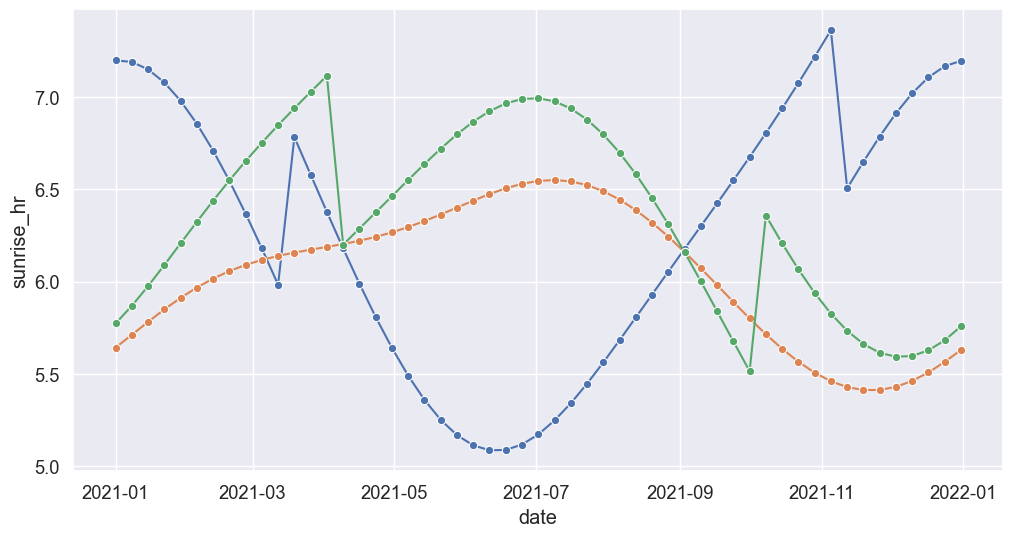

In [121]:
plot_daylight(df_annual_sun)

# Part 2: NASA API

![NASA](https://www.nasa.gov/wp-content/uploads/2025/06/54614323748-5967d5c0c5-o.jpg)

In this part, you would be using the NASA Power API (https://power.larc.nasa.gov/). 

Just like with OpenWeather, we need to obtain the API key from [here](https://api.nasa.gov/). This is much simpler than other APIs. The API key will be emailed to you. Make sure you use that api key

## Part 2.1: Obtaining data from the NASA Power API (5 points)

In this task, you need to collect 1 month of daily environmental data from the NASA POWER API for your **Favorite Place**. For example Prof. Singhal's favorite place is Tokyo. You need to find the latitudes and longitudes of your favorite place and obtain the data. 

Additionally, you need to provide the API with the start and end dates. For the end date, you need to use `datetime.now().strftime('%Y%m%d')` and the start date would be 30 days before this date. 

In [ ]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

def get_nasa_data(start_date, end_date, api_key='[YOUR API KEY HERE]'):
    """Takes the start and end date and fetches the Power data.
    
    Args:
        start_date (str): the start date of data collection
        end_date (str): the end date of data collection
        api_key (str): API key of the student

    Returns:
        json of the power data
    """
    
    # Fill this with your own (Make sure you change the Lat and Long) 
    
    lat = 36.39
    
    long = 25.46
    
    base_url = "https://power.larc.nasa.gov/api/temporal/daily/point"
    
    params = {
    "start": start_date,
    "end": end_date,
    "latitude": lat,
    "longitude": long,
    "community": "RE",
    "parameters": "T2M_MAX,PRECTOTCORR,ALLSKY_SFC_SW_DWN",
    "format": "JSON",
    "api_key": api_key
    } 


    # return the output
    return 



In [ ]:
# Here compute the start and end date:

end_date=
start_date =

raw_data = get_nasa_data(start_date, end_date)

#uncomment to see if the code works
# print(raw_data)

## Part 2.2: Build a dictionary from the output (5 points)

In this part, you need to create a dictionary where each key is a date, and the value is another dictionary with variables like temperature, solar radiation, and preciptation. These are the three things you already passed as parameters in the last part. 

Save the daily values of `T2M_MAX` as the key name: `max_temp_C`, `PRECTOTCORR` as `precip_mm`, and `ALLSKY_SFC_SW_DWN` as `solar_rad_kWh`. 


## Part 2.3: Convert the dictionary to a pandas dataframe (5 points)

Now convert the dictionary that you created in Part 2.2 into a pandas dataframe and print the first 20 rows.

Make sure that each row name is the date and the dates are in the following format '%Y-%m-%d'

## Part 2.4: Cleaning/manipulating (5 points)

Convert the values of temperature from Celsius to Fahrenheit. Additionally, normalize the values that are in `solar_rad_kWh` and save the values of the normalized values as a new column and chnage the index coloumn as date.

Print the final dataframe

## Part 2.5: Plotting (5 points)

Using plotly, make the following plots as line plots:
- of date (x-axis) versus max_temp_F (y-axis) that has the solar_rad_kWh as hover data.
- of date (x-axis) versus precip_mm (y-axis) that has the solar_rad_kWh as hover data.
- of date (x-axis) versus solar_rad_norm (y-axis) that has the solar_rad_kWh as hover data.

In [ ]:
import plotly.express as px

# Part 3: Web Scraping EuroMillions Results Continued...

For this problem, we continue with creating a small data set scraped from [Euro-Millions](https://www.euro-millions.com/) which is a lottery that is played across nine European countries. Draws take place on Tuesday and Friday evenings with a minimum guaranteed jackpot of €17 million. **The beginning of this problem was on Lab 1; you will need to use the functions you built for Part 2 to complete this assignment**.

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
# replace the below with the corresponding function from Lab 1, Part 2.1

def get_lottery_html(code):
    
    pass

url_text = get_lottery_html('13-09-2024')

In [ ]:
# replace the below with the corresponding function from Lab 1, Part 2.2

def get_country_soup(html, country):
    
    pass

country_choice = 'BE'
my_country_soup = get_country_soup(url_text, country_choice)

## Part 3.1: Cleaning a Country (10 points)

Below is the function `clean_country_df()`, which takes the soup object from the previous function and creates a data frame with the following columns:

    - `balls`: the number of balls matched
    - `stars`: the number of stars matched
    - `ppw`: the prize per winner
    - `country_winners`: how many winners of the prize in the given country
    - `total_winners`: the total number of winners
    - `country`: the country name
    - `currency`: the currency of the lottery

I have written the function and (*given your function from lab works*) it should work. **DO NOT CHANGE ANYTHING IN THE BODY OF THE FUNCTION.**

**In a markdown cell** create a bullet point list where you explain each what each chunk of code does. Your bullet point list should have **THREE** sections, with **NINE** total bullet points/explanations corresponding to the chunks below the `# EXPLAIN THIS (number)` comments. You must accurately summarize the content of each code chunk.

In [ ]:
from itertools import zip_longest
import re

def clean_country_df(soup, country_name = "BE"):
    """Takes the soup of a country and cleans it, creating a data frame.
    
    Args:
        soup (soup): the soup from get_country_soup
        country_name (str): name of the country (make sure this matches with the code used in the previous part)

    Returns:
        clean_country_df (DataFrame): a DataFrame with seven columns corresponding to
            balls matched
            stars matched
            prize per winner
            country winners
            total winners
            country
            currency
    """
    # EXPLAIN THIS (1.1)
    table = soup.find('table')

    # EXPLAIN THIS (1.2)
    headers = [th.get_text(strip=True) for th in table.find('thead').find_all('th')]

    # EXPLAIN THIS (1.3)
    country_winner_index = next((i for i, header in enumerate(headers) if 'Winners' in header and 'Total' not in header), None)

    # EXPLAIN THIS (1.4)
    balls_matched = []
    stars_matched = []
    prize_per_winner = []
    country_winners = []
    total_winners = []
    currencies = []
    
    # Process each row in the table body, excluding the last totals row
    for row in table.find('tbody').find_all('tr')[:-1]:
        columns = row.find_all('td')
        
        # EXPLAIN THIS (2.1)
        numbers_matched = columns[0].get_text(strip=True)
        prize = columns[1].get_text(strip=True)
        country_winner = columns[country_winner_index].get_text(strip=True) if country_winner_index is not None else 'N/A'
        total_winner = columns[-1].get_text(strip=True)
        
        # EXPLAIN THIS (2.2)
        currency_match = re.match(r'^\D*', prize)
        currency = currency_match.group(0) if currency_match else 'N/A'
        currencies.append(currency)
        
        # EXPLAIN THIS (2.3)
        numeric_prize = pd.to_numeric(prize.replace(currency, '').replace(',', ''), errors='coerce')
        
        # EXPLAIN THIS (2.4)
        numbers_split = numbers_matched.split('+')
        balls = pd.to_numeric(numbers_split[0].strip().replace(',', ''), errors='coerce')
        stars = pd.to_numeric(numbers_split[1].strip().replace(',', ''), errors='coerce') if len(numbers_split) > 1 else 0

        balls_matched.append(balls)
        stars_matched.append(stars)
        prize_per_winner.append(numeric_prize)
        country_winners.append(pd.to_numeric(country_winner.replace(',', ''), errors='coerce'))
        total_winners.append(pd.to_numeric(total_winner.replace(',', ''), errors='coerce'))
    
    # EXPLAIN THIS (3)
    data = {
        'balls': balls_matched,
        'stars': stars_matched,
        'ppw': prize_per_winner,
        'country_winners': country_winners,
        'total_winners': total_winners,
        'country': [country_name] * len(balls_matched),
        'currency': currencies
    }
    
    clean_country_df = pd.DataFrame(data)
    
    return clean_country_df

# Example usage
clean_df = clean_country_df(my_country_soup, 'BE')
clean_df

Your answer in this cell:
- Explain Code Chunks 1:
  
    -
    -
    -
    -
- Explain Code Chunks 2:
  
    -
    -
    -
    -
- Explain Code Chunk 3:

    -

## Part 3.2: Stacking the Countries (5 points)

Complete the function `stack_countries_df()` below (including docstring) which takes as an argument a list of country codes (strings) and a list of dates (strings), and uses the functions from the previous three parts to create a single data frame with results across those countries and dates. There may be multiple ways to do this, but one way could be to first loop through the dates, use the `get_lottery_html()` function, then loop through the countries and apply the other two functions. You will also want to add a column with the date information to the final data frame.

**Make sure to remove the `pass` statement when you are finished.** Then, also make sure to run the code to ensure your function works.

In [ ]:
def stack_countries_df(country_list, date_list):
    
    pass


In [ ]:
country_codes = ['BE', 'GB', 'CH']
dates = ['26-04-2024', '30-04-2024']
combined_df = stack_countries_df(country_codes, dates)
combined_df

## Part 3.3: EDA and Data Viz (10 points)

The first code cell below runs your function from part 4 to get the lottery results for Belgium and France over the month of April 2024. Use this data frame to:

- Create a subset which contains only the 5 ball, 0 star winners
- Plot a line plot that compares the number of 5 ball, 0 star winners for in Belgium and France over April

**Then, in a markdown cell** discuss briefly what this plot tells you.

In [ ]:
country_codes = ['BE', 'FR']
dates = ['02-04-2024', '05-04-2024', '09-04-2024', 
         '12-04-2024', '16-04-2024', '19-04-2024', 
         '23-04-2024', '26-04-2024', '30-04-2024']
combined_df = stack_countries_df(country_codes, dates)

In [ ]:
combined_df.tail()

In [ ]:
# Create the subset here

In [ ]:
# Create the line plot here (you may use matplotlib or plotly)

# Part 4: Summarizing and Visualizing Data

For this part, you will use the `players_fifa23.csv` from Canvas to investigate the ratings for soccer players in the FIFA 23 video game. Make sure the `.csv` is in the same directory as this notebook file.

**Note**: You do not need to know anything about soccer or video games to complete this problem, only perhaps that a higher `Overall` rating is considered a good thing.

## Part 4.1: Plotting Data (15 points)

Create a plotly scatter plot which shows the mean `Overall` rating for soccer players (rows) of a given `Nationality` for a particular `Age`. Focuse on three countries (`England`, `Germany`, `Spain`). In other words, your plot's x-axis should be `Age`, the y-axis should be `Overall`, and there should be three different colored points at each `Age`, one for each `Nationality`.

Export your graph as an html file `age_ratings_nationality.html`. You do not have to submit it with this homework, but the code should show that you did this.

Hints:
- There may be multiple ways/approaches to accomplish this task.
- One approach: you may use `groupby()` and boolean indexing to build these values in a loop which runs per each `Nationality`.
- `px.scatter()` will only graph data from columns (not the index).  Some approaches may need to graph data from the index.  You can use [df.reset_index()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html) to make your index a new column as shown [in this example](https://colab.research.google.com/drive/1d9JDphmpSTg9NtFMyfFnMQ6RmIx6zChK?usp=sharing)
- In some approaches you may need to pass multiple rows to [df.append()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.append.html) if need be as shown [in this example](https://colab.research.google.com/drive/1XbBHMcYq_2Q225nkKs3j06iigCQGmM4H?usp=sharing)
- In some approaches you may need to go from "wide" data to "long" data by using [df.melt()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.melt.html) as discussed [here](https://towardsdatascience.com/reshaping-a-pandas-dataframe-long-to-wide-and-vice-versa-517c7f0995ad)
- The first few code cells below get you started with looking at the data set.

In [ ]:
# use pandas to read in the data
import pandas as pd

df_fifa = pd.read_csv('players_fifa23.csv', index_col = 'ID')
df_fifa.head()

In [ ]:
df_fifa.Nationality.value_counts()

In [ ]:
df_fifa.shape

In [ ]:
df_fifa['Age'].unique()

In [ ]:
# making the plot
import plotly
import plotly.express as px

## Part 4.2: Numerical Summaries (10 points)

1. Calculate the sample mean and median of `Overall` for the entire data set. In a markdown cell, discuss what their relative values imply about the distribution of `Overall`, and then use the plot from 1.1 and these values to discuss whether you think English, German, and Spanish players are generally better rated than other country's players, and at what age do they become average players?
2. Calculate the `.group_by()` function to calculate the means and standard deviations of `Overall` for the three Nationalities in Part 1.1 (you will want to use the original data frame or a slightly modified version of it (the `.isin` function from pandas may help), **NOT** the data frame you used for the plot). What do these values tell you about the differences between English, German, and Spanish players?
3. Create a subset of the original data frame that includes only `Age`, `Height`, `Weight`, and `Overall`. Calculate the correlation matrix for these four features and discuss what the relationships seem to be and whether those relationships make sense to you.